# Exploring the Prosper Loan dataset
## Objective and Overview of dataset
In this project I am exploring a dataset containing loan details that have been borrowed on the p2p lending platform 'Prosper'. The dataset contains details of about 113,000 loans such as credit scores, grades and ratings, borrower rates, APR (Annual Percentage Rate), details of last occupation status and many more. My objective with this analysis is to better understand financial services datasets and the common vocabulary used. Also to gain some intuition for data that is captured as part of the loan application and approval process. The process I am following here would be to use visualizations to gain insight.

There are 81 attributes and 113k observations in the dataset.


- Top 10 borrower states
- Loan status categories
- credit grade distribution
- Borrower rate vs Loan status
- Borrower state vs Loan status
- Employment status vs Loan status
- Loan status vs Credit Grade (heatmap)

## Top borrower states
Let us first see how borrowers are distributed state wise. Looking at only the top 10 states

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

prosper_df = pd.read_csv('prosperLoanData.csv')
prosper_clean_df = prosper_df

base_color = sb.color_palette()[0]

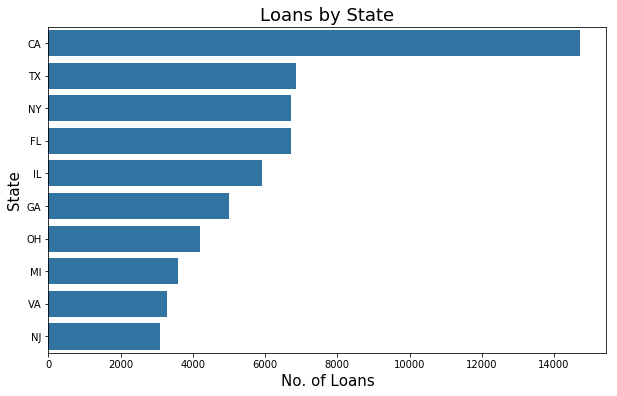

In [20]:
c = prosper_clean_df['BorrowerState'].value_counts()[:10]
fig, ax = plt.subplots(figsize=(10,6))
sb.countplot(y =prosper_clean_df['BorrowerState'],order = c.index,color = base_color)
# ax.set( xlabel = 'No. of Loans' , ylabel = 'State',title = 'Loans by State')
plt.xlabel('No. of Loans',fontsize = 15)
plt.ylabel('State', fontsize = 15)
ax.set_title('Loans by State',fontsize = 18);

The highest number of loans have been listed from CA (California) followed by TX (Texas), NY (New York) and FL (Florida).

## Loan status categories

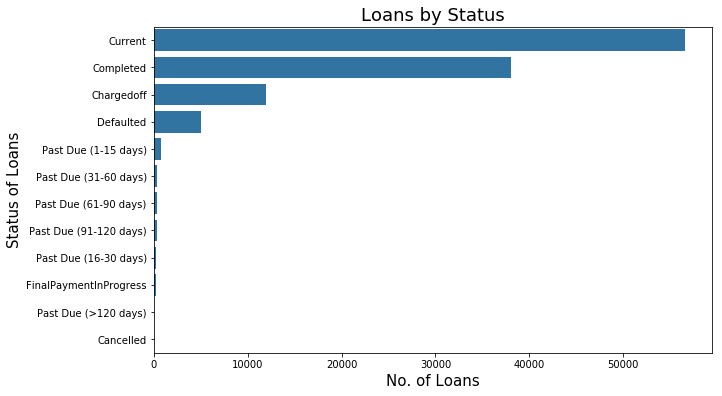

In [25]:
#cat_order = ['AA','A','B','C','D','E','HR','NC']
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(figsize=(10,6))

status_ord = prosper_df.LoanStatus.value_counts().index

sb.countplot(data = prosper_df, y= 'LoanStatus',color = base_color, order = status_ord)#,order = cat_order)
#lt.xticks(rotation=45)
plt.xlabel('No. of Loans',fontsize = 15)
plt.ylabel('Status of Loans', fontsize = 15)
plt.title('Loans by Status',fontsize = 18);

We can see that the loans are mostly in Current, Completed, Chargedoff and Defaulted categories. My further analysis would be to understand if any variables impact whether the loans fall in Default, Charged off or Completed categories. I keep the other categories out of my analysis as we do not know for sure that the loan payments would be completed or defaulted.
## Credit Grade Distribution
To see how the loans are distributed according to the grade.

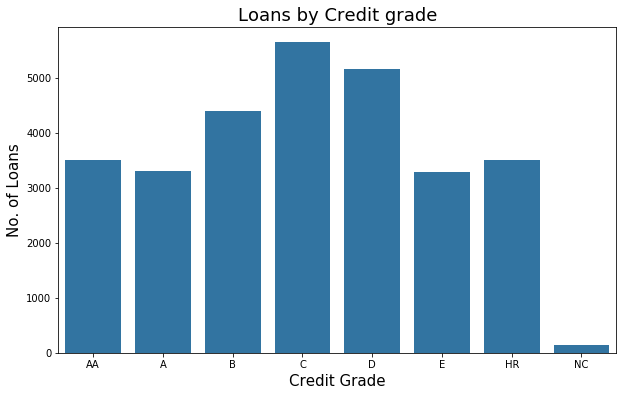

In [28]:
fig, ax = plt.subplots(figsize=(10,6))

cat_order = ['AA','A','B','C','D','E','HR','NC']
base_color = sb.color_palette()[0]
sb.countplot(data = prosper_df, x = 'CreditGrade',color = base_color,order = cat_order)

plt.xlabel('Credit Grade',fontsize = 15)
plt.ylabel('No. of Loans', fontsize = 15)
plt.title('Loans by Credit grade',fontsize = 18);

The above plot shows that the grades are given in a fairly normal distribution. The most common grade given is C.
## Employment status
What employment status was selected by the borrower during application for loan is visualized below.

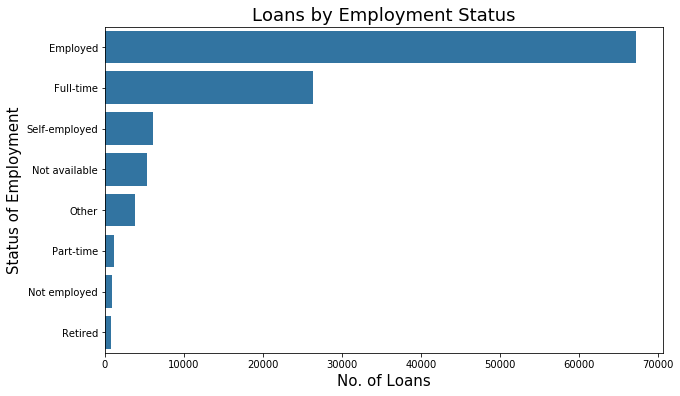

In [32]:
c = prosper_clean_df['EmploymentStatus'].value_counts()
fig, ax = plt.subplots(figsize=(10,6))
sb.countplot(y =prosper_clean_df['EmploymentStatus'],order = c.index,color = base_color)

plt.xlabel('No. of Loans',fontsize = 15)
plt.ylabel('Status of Employment', fontsize = 15)
plt.title('Loans by Employment Status',fontsize = 18);

Employed and Fulltime job holders make up the majority of the borrowers on Prosper.
## Borrower Rate vs Loan status
Here we see below that the borrower rate was decided quite well by the company. The median borrower rate increases if the loan is defaulted or charged off compared to if the loan was completed.

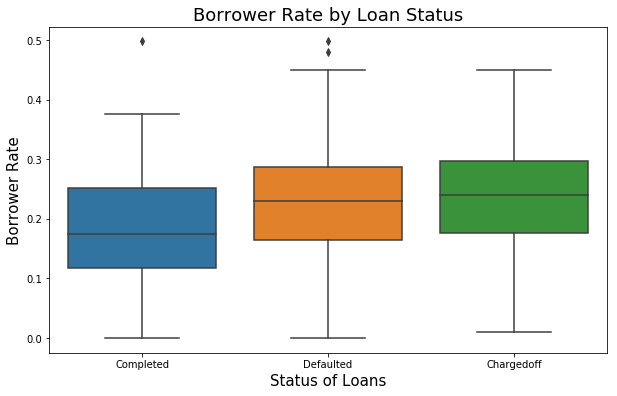

In [35]:
c = prosper_clean_df
loan_stat_ord = ['Completed','Defaulted','Chargedoff']

c = c[c.LoanStatus.isin(loan_stat_ord)]

# g = sb.FacetGrid(data = c, col = 'LoanStatus')
# g.map(sb.distplot, 'EmploymentStatusDuration',kde=False)

fig,ax = plt.subplots(figsize = (10,6))

sb.boxplot(data = c, x = 'LoanStatus',y = 'BorrowerRate',ax = ax)

c.groupby('LoanStatus').median().BorrowerRate

plt.xlabel('Status of Loans',fontsize = 15)
plt.ylabel('Borrower Rate', fontsize = 15)
plt.title('Borrower Rate by Loan Status',fontsize = 18);

## Borrower state vs Loan Status

Looking at absolute numbers of loans defaulted or completed for each state would not serve the purpose of actually comparing statewise credit performance. The loans applied for and given vary statewise. Hence I chose to visualize the percentage of loans in each status category, state wise.

An interesting insight is that there is a higher chance the loan is **completed** without default or being chargedoff, if the borrower is from **NY** than from the other states.

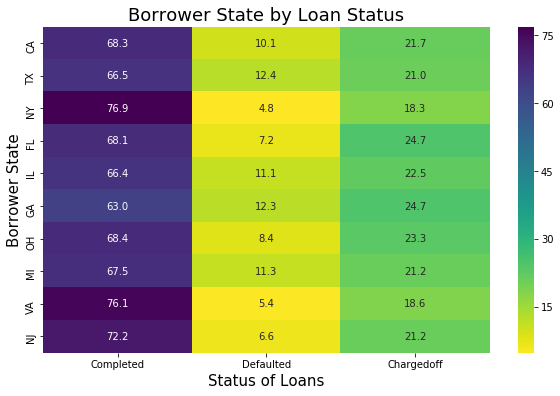

In [39]:
fig,ax = plt.subplots(figsize = (10,6))

c = prosper_clean_df
state_ord = c.BorrowerState.value_counts().index[:10]  # Taking only the top 10 states by number of loans borrowed

c = c[c.BorrowerState.isin(state_ord)]
loan_stat_ord = ['Completed','Defaulted','Chargedoff']

c = c[c.LoanStatus.isin(loan_stat_ord)]

# Creating matrix data for plotting heatmap
c = c.groupby(['LoanStatus','BorrowerState']).size().unstack('LoanStatus')[loan_stat_ord].T[state_ord].T

# Calculating percentages for each loan status
col_sum = c.sum(axis=1)
for col in c.columns:
    c[col] = c[col]/col_sum*100


sb.heatmap(c, cmap = 'viridis_r', annot = True, fmt = '0.1f')

plt.xlabel('Status of Loans',fontsize = 15)
plt.ylabel('Borrower State', fontsize = 15)
plt.title('Borrower State by Loan Status',fontsize = 18);

## Employment status vs Loan Status

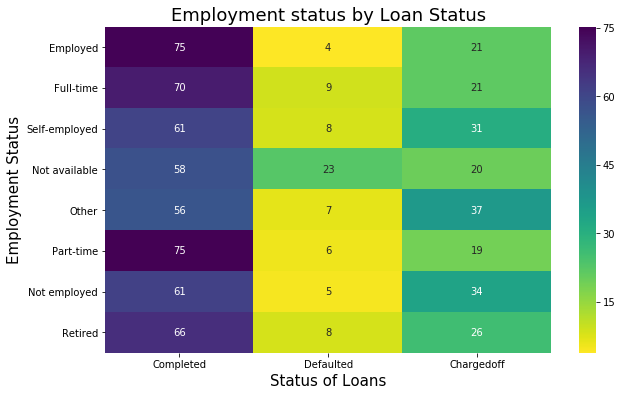

In [41]:
fig,ax = plt.subplots(figsize = (10,6))
c = prosper_clean_df
loan_stat_ord = ['Completed','Defaulted','Chargedoff']
emp_stat_ord = c.EmploymentStatus.value_counts().index

c = c[c.LoanStatus.isin(loan_stat_ord)]
c = c.groupby(['EmploymentStatus','LoanStatus']).size().unstack('EmploymentStatus')[emp_stat_ord].T[loan_stat_ord]

c['total'] = c.sum(axis=1)
for col in c.columns[:-1]:
    c[col] = c[col]/c.total*100

c.drop('total',axis=1,inplace=True)


sb.heatmap(c, cmap = 'viridis_r',annot = True, fmt = '0.0f')

plt.xlabel('Status of Loans',fontsize = 15)
plt.ylabel('Employment Status', fontsize = 15)
plt.title('Employment status by Loan Status',fontsize = 18);

## Credit Grade vs Loan Status

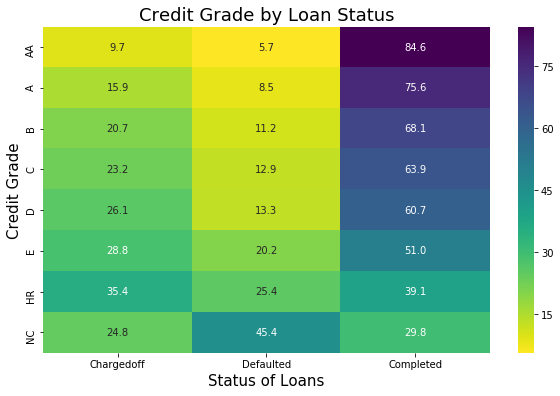

In [44]:
# Only selecting loan status values that we are interested in
c = prosper_clean_df[prosper_clean_df.LoanStatus.isin(['Completed','Defaulted','Chargedoff'])]


# Grouping by columns and ordering the x axis groups in the required order
cat_order = ['AA','A','B','C','D','E','HR','NC']
c = c.groupby(['LoanStatus','CreditGrade']).size().unstack('CreditGrade')[cat_order].T[['Chargedoff','Defaulted','Completed']]

col_sum = c.sum(axis=1)
for col in c.columns:
    c[col] = c[col]/col_sum*100

fig,ax = plt.subplots(figsize = (10,6))

sb.heatmap(c,cmap = 'viridis_r',annot=True,fmt='0.1f')

plt.xlabel('Status of Loans',fontsize = 15)
plt.ylabel('Credit Grade', fontsize = 15)
plt.title('Credit Grade by Loan Status',fontsize = 18);


- Top 10 borrower states
- Loan status categories
- credit grade distribution
- Top 10 Employment status
- Borrower rate vs Loan status
- Borrower state vs Loan status
- Employment status vs Loan status
- Loan status vs Credit Grade (heatmap)